# **GLOBAL AI HUB - AYGAZ VERİ ANALİZİ BOOTCAMP PROJESİ**

#   **1.Veri Setinin Hazırlanması**



**Veri Seti:**

NASA-Nearest Earth Objects:
https://www.kaggle.com/datasets/sameepvani/nasa-nearest-earth-objects/data

Veri seti, NASA'nın, Dünya'ya yakın gök cisimlerini incelemek amacıyla kurulan "Center for NEO Studies (CNEOS)"dan alınan asteroid verileriyle oluşturulmuştur.

Sütunlar:

* **id:** Asteroid için tanımlayıcı bir id.
* **name:** NASA tarafından asteroide verilen isim.
* **est_diameter_min:** Tahmini minimum çap (km).
* **est_diameter_min:** Tahmini maksimum çap (km).
* **relative_velocity:** Cismin göreceli hızı (Dünya'ya göre,km/s).
* **miss_distance:** Dünya ile minimum yaklaşma mesafesi (km).
* **orbiting_body:** Gök cisminin yörüngesinde bulunduğu diğer bir cisim.
* **sentry_object:** Cismin Sentry sistemi tarafından izlenip izlenmediği bilgisi.
* **absolute_magnitude:** Cismin parlaklığı.
* **hazardous:** Cismin potansiyel olarak tehlikeli olarak sınıflandırılıp sınıflandırılmadığı bilgisi.


![](http://cneos.jpl.nasa.gov/images/cneos_banner.png)

In [1]:
#Gerekli kütüphanelerin yüklenmesi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")



In [2]:
#Csv dosyasını okumak için pandas kütüphanesine ait fonksiyonu kullanalım.
#Öncelikle bir dataframe oluşturalım.
df_= pd.read_csv('/kaggle/input/nasa-nearest-earth-objects/neo_v2.csv')

#Bir sorun olması ihtimaline karşın verimizin kopyasını alıp kullanıyoruz.
df_c=df_.copy()


#   **2.Veri Setinin İncelenmesi** 

In [3]:
#İlk 10 kaydı inceleyelim.
df_c.head(10)

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True
5,54138696,(2021 GY23),0.036354,0.081291,34297.587778,4.058569e+07,Earth,False,24.32,False
6,54189957,(2021 PY40),0.171615,0.383743,27529.472307,2.906912e+07,Earth,False,20.95,False
7,54230078,(2021 XD6),0.005328,0.011914,57544.470083,5.511502e+07,Earth,False,28.49,False
8,2088213,88213 (2001 AF2),0.350393,0.783502,56625.210122,6.903598e+07,Earth,False,19.40,False
9,3766065,(2016 YM),0.105817,0.236614,48425.840329,3.835526e+07,Earth,False,22.00,False


In [4]:
#Son 10 kaydı inceleyelim.
df_c.tail(10)

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
90826,3837953,(2019 BF1),0.086807,0.194106,45322.795023,4.095345e+07,Earth,False,22.43,False
90827,54087420,(2020 VL),0.024692,0.055213,14655.044804,1.766750e+07,Earth,False,25.16,False
90828,3363723,(2006 XW4),0.036691,0.082043,26172.119254,2.249368e+06,Earth,False,24.30,False
90829,3587872,(2011 WA),0.123184,0.275448,80671.310009,6.897365e+07,Earth,False,21.67,False
90830,3678630,(2014 OL339),0.069913,0.156329,38102.469622,4.667988e+07,Earth,False,22.90,False
90831,3763337,(2016 VX1),0.026580,0.059435,52078.886692,1.230039e+07,Earth,False,25.00,False
90832,3837603,(2019 AD3),0.016771,0.037501,46114.605073,5.432121e+07,Earth,False,26.00,False
90833,54017201,(2020 JP3),0.031956,0.071456,7566.807732,2.840077e+07,Earth,False,24.60,False
90834,54115824,(2021 CN5),0.007321,0.016370,69199.154484,6.869206e+07,Earth,False,27.80,False
90835,54205447,(2021 TW7),0.039862,0.089133,27024.455553,5.977213e+07,Earth,False,24.12,False


In [5]:
#Veri hakkında genel bilgiler
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   orbiting_body       90836 non-null  object 
 7   sentry_object       90836 non-null  bool   
 8   absolute_magnitude  90836 non-null  float64
 9   hazardous           90836 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 5.7+ MB


In [6]:
#Her sütunda kaç veri olduğu bilgisi
df_c.count()

id                    90836
name                  90836
est_diameter_min      90836
est_diameter_max      90836
relative_velocity     90836
miss_distance         90836
orbiting_body         90836
sentry_object         90836
absolute_magnitude    90836
hazardous             90836
dtype: int64

In [7]:
#Sütunları ayrıca yazdırabiliriz
df_c.columns

Index(['id', 'name', 'est_diameter_min', 'est_diameter_max',
       'relative_velocity', 'miss_distance', 'orbiting_body', 'sentry_object',
       'absolute_magnitude', 'hazardous'],
      dtype='object')

In [8]:
#Veri tipleri
df_c.dtypes

id                      int64
name                   object
est_diameter_min      float64
est_diameter_max      float64
relative_velocity     float64
miss_distance         float64
orbiting_body          object
sentry_object            bool
absolute_magnitude    float64
hazardous                bool
dtype: object

# **2.1.Kategorik Değişken Analizi**

In [9]:
df_categorical=df_c.select_dtypes(include=["object","bool"])
df_categorical.head(5)

,name,orbiting_body,sentry_object,hazardous
0,162635 (2000 SS164),Earth,False,False
1,277475 (2005 WK4),Earth,False,True
2,512244 (2015 YE18),Earth,False,False
3,(2012 BV13),Earth,False,False
4,(2014 GE35),Earth,False,True


# **2.2.Nümerik Değişken Analizi**

In [10]:
df_numerical=df_c.select_dtypes(include= "float64" )
df_numerical.head(5)

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
0,1.198271,2.679415,13569.249224,5.483974e+07,16.73
1,0.265800,0.594347,73588.726663,6.143813e+07,20.00
2,0.722030,1.614507,114258.692129,4.979872e+07,17.83
3,0.096506,0.215794,24764.303138,2.543497e+07,22.20
4,0.255009,0.570217,42737.733765,4.627557e+07,20.09


Değişkenler arası korelasyonu (ilişkinin kuvvetini) ısı haritası yardımıyla görelim.

In [11]:
#Öncelikle bir korelasyon matrisi oluşturmalıyız.
corr_matrix=df_numerical.corr()
print(corr_matrix)

                    est_diameter_min  est_diameter_max  relative_velocity  \
est_diameter_min            1.000000          1.000000           0.221553   
est_diameter_max            1.000000          1.000000           0.221553   
relative_velocity           0.221553          0.221553           1.000000   
miss_distance               0.142241          0.142241           0.327169   
absolute_magnitude         -0.560188         -0.560188          -0.353863   

                    miss_distance  absolute_magnitude  
est_diameter_min         0.142241           -0.560188  
est_diameter_max         0.142241           -0.560188  
relative_velocity        0.327169           -0.353863  
miss_distance            1.000000           -0.264168  
absolute_magnitude      -0.264168            1.000000  


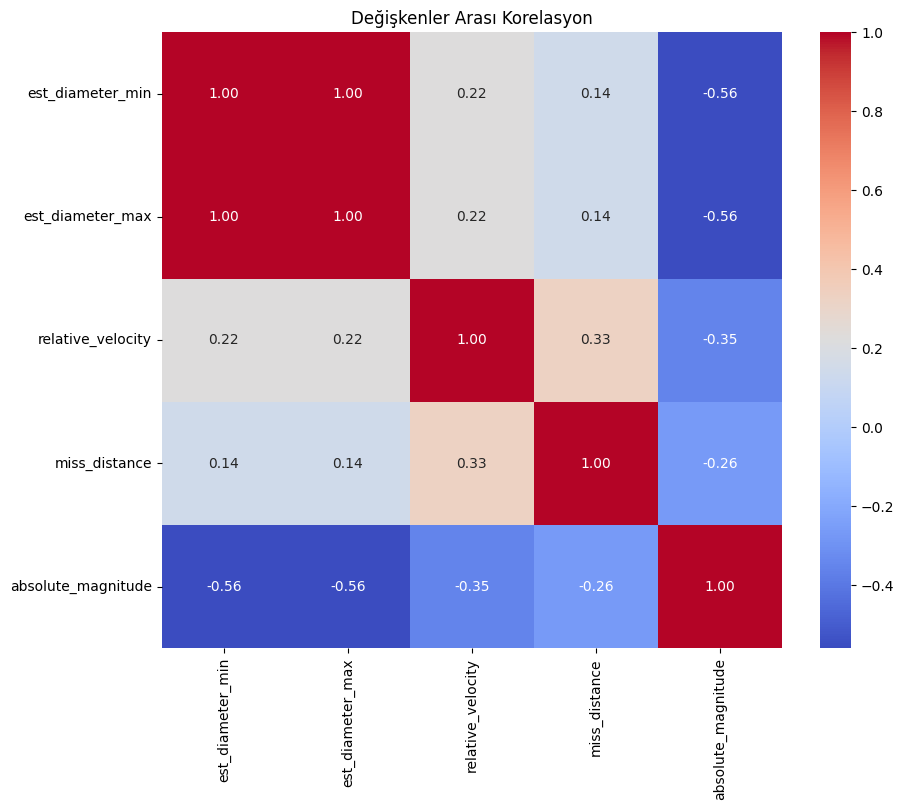

In [12]:
# Isı haritasını çizdirelim
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Değişkenler Arası Korelasyon')
plt.show()

# **3.Feature Selection**


**Verilerimizde herhangi bir değişiklik yapmadan önce veri setine ilk baktığımızda "orbiting_body ve sentry_object" sütunlarındaki tüm değerlerin aynı olduğu dikkatimizi çekmişti. Bunların kontrolünü sağlayalım.**

**Bazı istisnalar dışında, değerlerin tüm gözlemler için aynı olduğu durumlarda, o sütunun bize faydası olmamakta, hatta hesaplama maliyetlerini artırarak olumsuz sonuçlar doğurmaktadır. Özellikle daha ileri makine öğrenmesi yöntemlerinde modeli gereksiz karmaşık hale getirip hatalı sonuçlara ulaşmamıza neden olabilmektedir.**


In [13]:
#İlgili ilk sütunun tüm değerlerini çağıralım
df_c["orbiting_body"]

0        Earth
1        Earth
2        Earth
3        Earth
4        Earth
         ...  
90831    Earth
90832    Earth
90833    Earth
90834    Earth
90835    Earth
Name: orbiting_body, Length: 90836, dtype: object

In [14]:
#Şimdi de daha detaylı bir şekilde her değere ait kaç gözlem var bakalım.
df_c["orbiting_body"].value_counts()

orbiting_body
Earth    90836
Name: count, dtype: int64

Tüm değerlerin aynı olduğunu gördük.

In [15]:
#orbiting_body sütununu silelim
df_c.drop("orbiting_body",axis=1,inplace=True)

In [16]:
#Silinip silinmediğini kontrol edelim.
df_c.head(10)

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,False,20.09,True
5,54138696,(2021 GY23),0.036354,0.081291,34297.587778,4.058569e+07,False,24.32,False
6,54189957,(2021 PY40),0.171615,0.383743,27529.472307,2.906912e+07,False,20.95,False
7,54230078,(2021 XD6),0.005328,0.011914,57544.470083,5.511502e+07,False,28.49,False
8,2088213,88213 (2001 AF2),0.350393,0.783502,56625.210122,6.903598e+07,False,19.40,False
9,3766065,(2016 YM),0.105817,0.236614,48425.840329,3.835526e+07,False,22.00,False


In [17]:
#İlgili ikinci sütunun tüm değerlerini çağıralım.
df_c["sentry_object"]

0        False
1        False
2        False
3        False
4        False
         ...  
90831    False
90832    False
90833    False
90834    False
90835    False
Name: sentry_object, Length: 90836, dtype: bool

In [18]:
#Aynı şekilde hangi değere ait kaç gözlem olduğuna bakalım
df_c["sentry_object"].value_counts()

sentry_object
False    90836
Name: count, dtype: int64

Bu sütun için de tüm değerlerin aynı olduğunu gördük.

In [19]:
#Bu sütunu da silelim.
df_c.drop("sentry_object",axis=1,inplace=True)

In [20]:
#Kontrol edelim.
df_c.head(10)

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,20.09,True
5,54138696,(2021 GY23),0.036354,0.081291,34297.587778,4.058569e+07,24.32,False
6,54189957,(2021 PY40),0.171615,0.383743,27529.472307,2.906912e+07,20.95,False
7,54230078,(2021 XD6),0.005328,0.011914,57544.470083,5.511502e+07,28.49,False
8,2088213,88213 (2001 AF2),0.350393,0.783502,56625.210122,6.903598e+07,19.40,False
9,3766065,(2016 YM),0.105817,0.236614,48425.840329,3.835526e+07,22.00,False


**Son olarak,anlamlı bir etkisi olmayacağı ve her bir kayıt için zaten benzersiz bir id bulunduğu için "name" sütununu analizimiz dışında bırakabiliriz.**

In [21]:
# Analiz için sadece gerekli sütunları seçelim.
columns_to_use = [col for col in df_c.columns if col not in ['name']]

#Sadece seçilen sütunların olduğu yeni bir dataframe oluşturduk.
df = df_c[columns_to_use]


In [22]:
df.head(10)

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,2162635,1.198271,2.679415,13569.249224,5.483974e+07,16.73,False
1,2277475,0.265800,0.594347,73588.726663,6.143813e+07,20.00,True
2,2512244,0.722030,1.614507,114258.692129,4.979872e+07,17.83,False
3,3596030,0.096506,0.215794,24764.303138,2.543497e+07,22.20,False
4,3667127,0.255009,0.570217,42737.733765,4.627557e+07,20.09,True
5,54138696,0.036354,0.081291,34297.587778,4.058569e+07,24.32,False
6,54189957,0.171615,0.383743,27529.472307,2.906912e+07,20.95,False
7,54230078,0.005328,0.011914,57544.470083,5.511502e+07,28.49,False
8,2088213,0.350393,0.783502,56625.210122,6.903598e+07,19.40,False
9,3766065,0.105817,0.236614,48425.840329,3.835526e+07,22.00,False


In [23]:
#Sürekli değişkenler hakkında bazı istatistiklere bakalım.
df.describe().T #transpoze 

,count,mean,std,min,25%,50%,75%,max
id,90836.0,1.438288e+07,2.087202e+07,2.000433e+06,3.448110e+06,3.748362e+06,3.884023e+06,5.427591e+07
est_diameter_min,90836.0,1.274321e-01,2.985112e-01,6.089126e-04,1.925551e-02,4.836765e-02,1.434019e-01,3.789265e+01
est_diameter_max,90836.0,2.849469e-01,6.674914e-01,1.361570e-03,4.305662e-02,1.081534e-01,3.206564e-01,8.473054e+01
relative_velocity,90836.0,4.806692e+04,2.529330e+04,2.033464e+02,2.861902e+04,4.419012e+04,6.292360e+04,2.369901e+05
miss_distance,90836.0,3.706655e+07,2.235204e+07,6.745533e+03,1.721082e+07,3.784658e+07,5.654900e+07,7.479865e+07
absolute_magnitude,90836.0,2.352710e+01,2.894086e+00,9.230000e+00,2.134000e+01,2.370000e+01,2.570000e+01,3.320000e+01


Sırasıyla: veri sayısı-ortalama-standart sapma- minimum değer- 25lik yüzdelik dilim-50lik yüzdelik dilim- 75lik yüzdelik dilim-maksimum değer


#   **4.Eksik Veri Analizi** 

In [24]:
#Her sütunda varsa kaçar tane null değer olduğunu görelim.
df.isnull().sum()

id                    0
est_diameter_min      0
est_diameter_max      0
relative_velocity     0
miss_distance         0
absolute_magnitude    0
hazardous             0
dtype: int64

In [25]:
#Tüm veri setindeki toplam eksik değer sayısı
df.isnull().sum().sum()

0

# **4.1.Veri Setine NaN Değerler Eklenmesi**

In [26]:
import random
#Random eksik değerler ekleme fonksiyonu
def add_random_missing_values(dataframe: pd.DataFrame,
                              missing_rate: float = 0.01,
                              seed: random = 42) -> pd.DataFrame:
    # Get copy of dataframe
    df_missing = dataframe.copy()
    
    # Obtain size of dataframe and number total number of missing values
    df_size = dataframe.size
    num_missing = int(df_size * missing_rate)
    
    if seed:
        random.seed(seed)
        
        
    for _ in range(num_missing):
        row_idx = random.randint(0, dataframe.shape[0] - 1)
        col_idx = random.randint(0, dataframe.shape[1] - 1)

        df_missing.iat[row_idx, col_idx] = np.nan
        
    return df_missing

df= add_random_missing_values(dataframe = df,
                               missing_rate = 0.01)
    

**Veri setimizin son halini kontrol edelim.**

In [27]:
df.head(10)

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,2162635.0,1.198271,2.679415,13569.249224,5.483974e+07,16.73,False
1,2277475.0,0.265800,0.594347,73588.726663,6.143813e+07,20.00,True
2,2512244.0,0.722030,1.614507,114258.692129,4.979872e+07,17.83,False
3,3596030.0,0.096506,0.215794,24764.303138,2.543497e+07,22.20,False
4,3667127.0,0.255009,0.570217,42737.733765,4.627557e+07,20.09,True
5,54138696.0,0.036354,0.081291,34297.587778,4.058569e+07,24.32,False
6,54189957.0,0.171615,0.383743,27529.472307,2.906912e+07,20.95,False
7,54230078.0,0.005328,0.011914,57544.470083,5.511502e+07,28.49,False
8,2088213.0,0.350393,0.783502,56625.210122,6.903598e+07,19.40,False
9,3766065.0,0.105817,0.236614,48425.840329,3.835526e+07,22.00,False


In [28]:
#Eksik değer olup olmadığını boolean olarak görelim.
df.isnull().any()

id                    True
est_diameter_min      True
est_diameter_max      True
relative_velocity     True
miss_distance         True
absolute_magnitude    True
hazardous             True
dtype: bool

In [29]:
#Her sütundaki eksik değer sayısını görelim.
df.isnull().sum()

id                    874
est_diameter_min      912
est_diameter_max      903
relative_velocity     905
miss_distance         888
absolute_magnitude    935
hazardous             908
dtype: int64

In [30]:
#Toplam eksik değer sayısı
df.isnull().sum().sum()

6325

In [31]:
df.isnull().any()


id                    True
est_diameter_min      True
est_diameter_max      True
relative_velocity     True
miss_distance         True
absolute_magnitude    True
hazardous             True
dtype: bool

In [32]:
#En az bir veri eksiği olan kayıtlar
df[df.isnull().any(axis = 1)]


,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
22,54053939.0,0.003052,0.006824,47644.448463,5.294885e+07,29.70,NaN
24,3329370.0,0.050647,0.113250,33803.166561,7.039487e+07,23.60,NaN
37,54235525.0,NaN,0.012649,62986.288326,3.112155e+07,28.36,False
53,3624232.0,0.334622,NaN,178961.517632,7.062110e+07,19.50,False
71,NaN,0.040230,0.089958,56257.766419,1.572924e+07,24.10,False
...,...,...,...,...,...,...,...
90739,54091650.0,0.221083,0.494356,108873.298914,NaN,20.40,False
90811,NaN,0.356907,0.798068,33008.617883,7.189835e+07,19.36,True
90812,2377732.0,1.034082,2.312278,53362.798148,4.756627e+07,17.05,NaN
90814,3713903.0,0.300992,0.673039,67655.563370,6.751135e+07,NaN,False


In [33]:
#Hiç eksik değeri olmayan kayıtlar
df[df.notnull().any(axis = 1)]

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,2162635.0,1.198271,2.679415,13569.249224,5.483974e+07,16.73,False
1,2277475.0,0.265800,0.594347,73588.726663,6.143813e+07,20.00,True
2,2512244.0,0.722030,1.614507,114258.692129,4.979872e+07,17.83,False
3,3596030.0,0.096506,0.215794,24764.303138,2.543497e+07,22.20,False
4,3667127.0,0.255009,0.570217,42737.733765,4.627557e+07,20.09,True
...,...,...,...,...,...,...,...
90831,3763337.0,0.026580,0.059435,52078.886692,1.230039e+07,NaN,False
90832,3837603.0,0.016771,0.037501,46114.605073,5.432121e+07,26.00,False
90833,54017201.0,0.031956,0.071456,7566.807732,2.840077e+07,24.60,False
90834,54115824.0,0.007321,0.016370,69199.154484,6.869206e+07,27.80,False


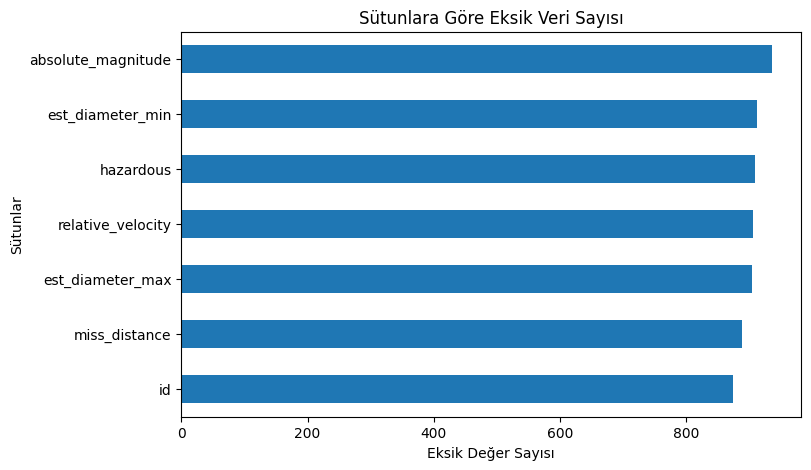

In [34]:
# Eksik değer sayısını sütunlara göre hesaplama
missing_counts = df.isnull().sum()
missing_counts = missing_counts[missing_counts > 0]  # Sadece eksik verisi olan sütunlar

# Eksik verileri çubuk grafikle gösterme
missing_counts.sort_values().plot(kind='barh', figsize=(8, 5))
plt.title("Sütunlara Göre Eksik Veri Sayısı")
plt.xlabel("Eksik Değer Sayısı")
plt.ylabel("Sütunlar")
plt.show()



# **4.2.Eksik Değerlerin Doldurulması**

şuraya bazı açıklamalar ekle

***

**id:**

Id değerlerinin analize anlamlı bir etkisi yoktur. Sadece her kayıt için atanan id değerlerinin birbirinden farklı olmasına dikkat etmeliyiz.  

En yüksek id'den başlayarak birer birer artacak şekilde eksik id değerlerini dolduralım.

In [35]:
#id değeri eksik olan kayıtları toplayalım
missing_indices = df['id'].isna()

#En yüksek id değerinin bir fazlasından başlayarak boş id'leri dolduralım.
df.loc[missing_indices,'id',]= [float(i) for i in range(int(df['id'].max()) + 1, 
                                                        int(df['id'].max()) + 1 + missing_indices.sum())]


In [36]:
df['id'].head(10)

0     2162635.0
1     2277475.0
2     2512244.0
3     3596030.0
4     3667127.0
5    54138696.0
6    54189957.0
7    54230078.0
8     2088213.0
9     3766065.0
Name: id, dtype: float64

In [37]:
df.describe().T 

,count,mean,std,min,25%,50%,75%,max
id,90836.0,1.476152e+07,2.112992e+07,2.000433e+06,3.455259e+06,3.750669e+06,3.893447e+06,5.427679e+07
est_diameter_min,89924.0,1.275301e-01,2.993896e-01,6.089126e-04,1.925551e-02,4.836765e-02,1.434019e-01,3.789265e+01
est_diameter_max,89933.0,2.840372e-01,6.071001e-01,1.361570e-03,4.305662e-02,1.081534e-01,3.206564e-01,5.152761e+01
relative_velocity,89931.0,4.807330e+04,2.530042e+04,2.714468e+02,2.862095e+04,4.419467e+04,6.294515e+04,2.369901e+05
miss_distance,89948.0,3.706287e+07,2.235476e+07,6.745533e+03,1.720021e+07,3.784551e+07,5.655173e+07,7.479865e+07
absolute_magnitude,89901.0,2.352652e+01,2.894555e+00,9.230000e+00,2.134000e+01,2.370000e+01,2.570000e+01,3.320000e+01


***

**est_diameter_min:**

Tek başına bu sütun için aynı değerlere bakalım.

In [38]:
df['est_diameter_min'].describe()

count    89924.000000
mean         0.127530
std          0.299390
min          0.000609
25%          0.019256
50%          0.048368
75%          0.143402
max         37.892650
Name: est_diameter_min, dtype: float64

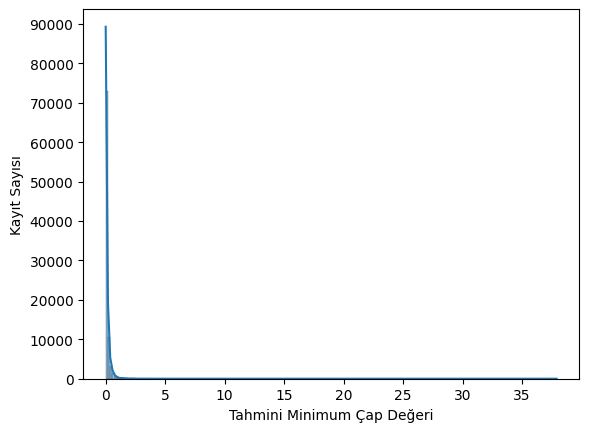

In [39]:
#Bu sütuna ait histogramı çizdirip dağılımlara bakalım.
sns.histplot(df['est_diameter_min'],bins=200,kde=True)

#Kayıt sayılarını daha detaylı gözlemlemek için aralıkları daraltalım.
plt.yticks(np.arange(0,100000,10000))
#1-100.000 arası değerleri, 10.000 aralıklarla yazdırdık.

# x ve y ekseni adlandırması
plt.xlabel("Tahmini Minimum Çap Değeri")
plt.ylabel("Kayıt Sayısı");

In [40]:
#Ortalama
df['est_diameter_min'].mean()

0.12753008205213626

Bu örnekteki gibi uniform olmayan,dengesiz dağılımlarda ortalamayı kullanmak mantıklı olmayacaktır.Ortalama değeri aykırı değerlerden çok etkilenir dolayısıyla hataya sebep olurç Bunun yerine medyana bakabiliriz. Medyan değeri ise aykırı değerlerden etkilenmez, bize verilerin dağılımı hakkında daha sağlıklı bilgiler verir.

In [41]:
#Medyan
df['est_diameter_min'].median()

0.0483676488

Bu sütun için medyan değerini kullanarak eksik değerleri tamamlayalım.

In [42]:
df['est_diameter_min'].fillna(value=df['est_diameter_min'].median(),inplace=True)

In [43]:
#Kontrol edelim.
df['est_diameter_min'].isnull().any()

False

In [44]:
df['est_diameter_min'].head(10)

0    1.198271
1    0.265800
2    0.722030
3    0.096506
4    0.255009
5    0.036354
6    0.171615
7    0.005328
8    0.350393
9    0.105817
Name: est_diameter_min, dtype: float64

***

**est_diameter_max:**

In [45]:
df['est_diameter_max'].describe()

count    89933.000000
mean         0.284037
std          0.607100
min          0.001362
25%          0.043057
50%          0.108153
75%          0.320656
max         51.527608
Name: est_diameter_max, dtype: float64

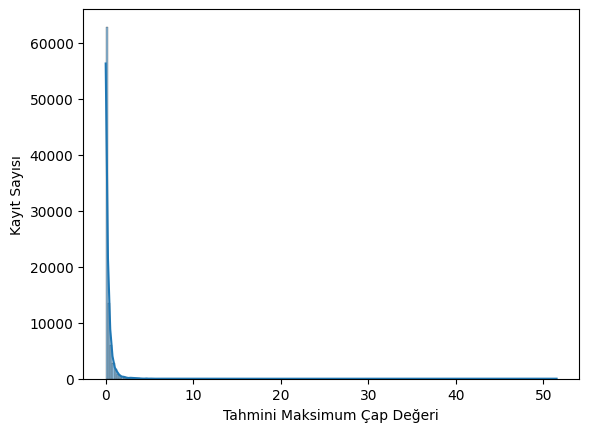

In [46]:
sns.histplot(df['est_diameter_max'],bins=200,kde=True)
plt.xlabel("Tahmini Maksimum Çap Değeri")
plt.ylabel("Kayıt Sayısı");

In [47]:
df['est_diameter_max'].mean()

0.28403719355049206

In [48]:
df['est_diameter_max'].median()

0.1081533507

Bu sütun için de medyan değerini kullanalım.

In [49]:
df['est_diameter_max'].fillna(value=df['est_diameter_max'].median(),inplace=True)

In [50]:
df['est_diameter_max'].isnull().any()

False

In [51]:
df['est_diameter_max'].head(10)

0    2.679415
1    0.594347
2    1.614507
3    0.215794
4    0.570217
5    0.081291
6    0.383743
7    0.011914
8    0.783502
9    0.236614
Name: est_diameter_max, dtype: float64

***

**relative_velocity:**

In [52]:
df['relative_velocity'].describe()

count     89931.000000
mean      48073.296937
std       25300.418742
min         271.446828
25%       28620.946129
50%       44194.670506
75%       62945.153669
max      236990.128088
Name: relative_velocity, dtype: float64

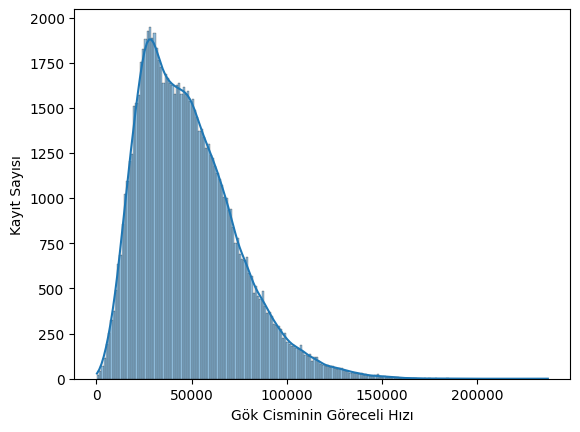

In [53]:
sns.histplot(df['relative_velocity'],bins=200,kde=True)
plt.xlabel("Gök Cisminin Göreceli Hızı")
plt.ylabel("Kayıt Sayısı");

In [54]:
df['relative_velocity'].mean()

48073.29693680234

In [55]:
df['relative_velocity'].median()

44194.6705059187

Dağılım çarpık olmasına rağmen medyan ve ortalama değerleri tesadüfen yakın çıktı. Ama genel olarak ortalama yanıltacağı için bu sütun için de medyan değerini kullanalım.

In [56]:
df['relative_velocity'].fillna(value=df['relative_velocity'].median(),inplace=True)

In [57]:
df['relative_velocity'].isnull().any()

False

In [58]:
df['relative_velocity'].head(10)

0     13569.249224
1     73588.726663
2    114258.692129
3     24764.303138
4     42737.733765
5     34297.587778
6     27529.472307
7     57544.470083
8     56625.210122
9     48425.840329
Name: relative_velocity, dtype: float64

***

**miss_distance:**

In [59]:
df['miss_distance'].describe()
#Değerler çok büyük olduğu için, değerler diğerlerinden farklı olarak euler sayısı ile yazdırıldı. Daha anlaşılır bir çıktı için değerleri ondalıklı sayı haline getirelim.

count    8.994800e+04
mean     3.706287e+07
std      2.235476e+07
min      6.745533e+03
25%      1.720021e+07
50%      3.784551e+07
75%      5.655173e+07
max      7.479865e+07
Name: miss_distance, dtype: float64

In [60]:
df['miss_distance'].describe().apply(lambda x: f"{x:.6f}") 

count       89948.000000
mean     37062872.495912
std      22354757.784814
min          6745.532516
25%      17200214.307774
50%      37845505.898709
75%      56551732.813358
max      74798651.452197
Name: miss_distance, dtype: object

**Lambda:** Python'da isimsiz olarak tanımlanan fonksiyonlara lambda fonksiyonu denir. Ancak başka bir fonksiyon içinde kullanıldıklarında anlamlı hale gelirler.

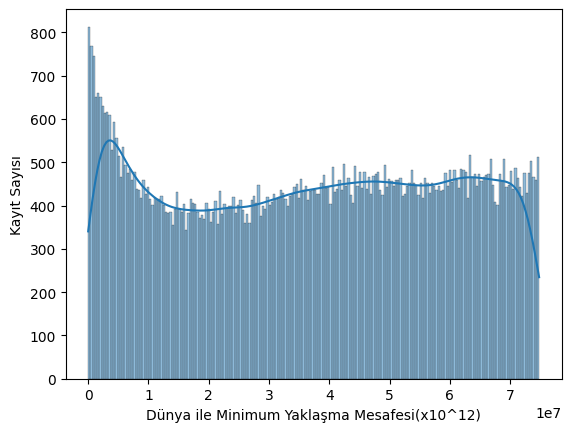

In [61]:
sns.histplot(df['miss_distance'],bins=200,kde=True)
plt.xlabel("Dünya ile Minimum Yaklaşma Mesafesi(x10^12)")
plt.ylabel("Kayıt Sayısı");



In [62]:
df['miss_distance'].mean()

37062872.49591155

In [63]:
df['miss_distance'].median()

37845505.89870917

Aynı şekilde medyan değerini kullanalım.

In [64]:
df['miss_distance'].fillna(value=df['miss_distance'].median(),inplace=True)

In [65]:
df['miss_distance'].isnull().any()

False

In [66]:
df['miss_distance'].head(10)

0    5.483974e+07
1    6.143813e+07
2    4.979872e+07
3    2.543497e+07
4    4.627557e+07
5    4.058569e+07
6    2.906912e+07
7    5.511502e+07
8    6.903598e+07
9    3.835526e+07
Name: miss_distance, dtype: float64

***

**absolute_magnitude:**

In [67]:
df['absolute_magnitude'].describe()

count    89901.000000
mean        23.526517
std          2.894555
min          9.230000
25%         21.340000
50%         23.700000
75%         25.700000
max         33.200000
Name: absolute_magnitude, dtype: float64

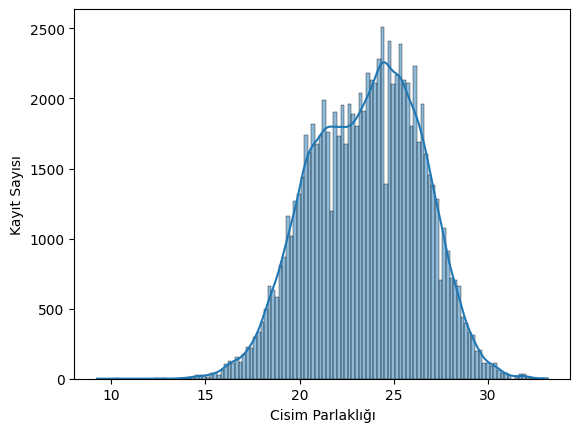

In [68]:
sns.histplot(df['absolute_magnitude'],kde=True)
plt.xlabel("Cisim Parlaklığı")
plt.ylabel("Kayıt Sayısı");

In [69]:
df['absolute_magnitude'].mean()

23.526516634965127

In [70]:
df['absolute_magnitude'].median()

23.7

Normale yakın bir dağılım olduğu için burada ortalamayı kullanabiliriz

In [71]:
df['absolute_magnitude'].fillna(value=df['absolute_magnitude'].mean(),inplace=True)

In [72]:
df['absolute_magnitude'].isnull().any()

False

In [73]:
df['absolute_magnitude'].head(10)

0    16.73
1    20.00
2    17.83
3    22.20
4    20.09
5    24.32
6    20.95
7    28.49
8    19.40
9    22.00
Name: absolute_magnitude, dtype: float64

# **5.Aykırı Değer (Outlier) Analizi**

**IQR (Interquartile Range) Yöntemi:**

 Bu yöntem, verilerin çeyrek dilimlerine (quartiles) göre analiz edilmesini sağlar.
 
IQR: bir veri setindeki 1. Çeyrek (Q1) ile 3. Çeyrek (Q3) arasındaki farktır. Bu iki değer, veri setinin orta yüzde 50'lik kısmını temsil eder. Formülü şu şekildedir:

IQR=Q3−Q1

Q1 (1. Çeyrek): Verilerin yüzde 25'inin altında kaldığı değer.

Q3 (3. Çeyrek): Verilerin yüzde 75'inin altında kaldığı değer.


Aykırı Değer Sınırları Nasıl Belirlenir?

IQR kullanılarak aykırı değer sınırları şu şekilde hesaplanır:

Alt Sınır (Lower Bound): Q1−1.5⋅IQR

Üst Sınır (Upper Bound):Q3+1.5⋅IQR

Bu sınırların dışında kalan değerler aykırı (outlier) olarak kabul edilir.

**est_diameter_min:**

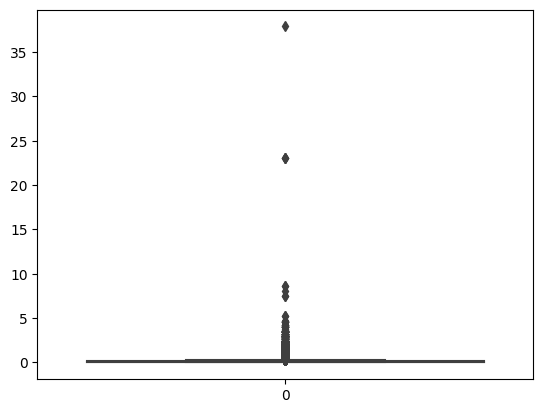

In [74]:
#Öncelikle bir kutu grafiği yardımı ile dağılıma bakalım.
#Boxplot genel olarak aykırı değerleri gözlemlemek için kullanışloı bör yöntemdir.
sns.boxplot(df['est_diameter_min']);

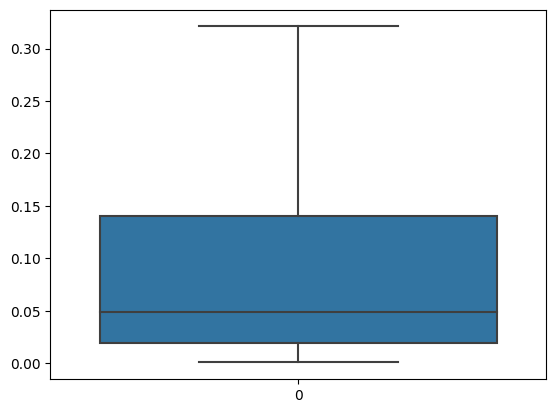

In [75]:
#Aykırı değerler olmasaydı dağılımın nasıl olacağını görelim.
sns.boxplot(df['est_diameter_min'], showfliers=False);


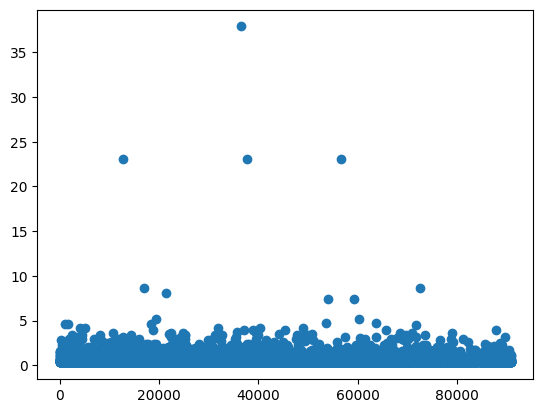

In [76]:
#Şimdi de yukarıda bahsettiğimiz IQR yöntemi ile aykırı değerleri gözlemleyelim.
# Çeyrekler ve IQR'ı hesaplayalım.
q1_1 = df['est_diameter_min'].quantile(0.25)
q3_1 = df['est_diameter_min'].quantile(0.75)
iqr1 = q3_1 - q1_1

#İsimlendirmede karışıklık olmaması adına değişkenlerin sonuna sütun sırasını belirten 1 sayısını ekledik. 

# Alt ve üst sınırları belirleyelim.
lower_bound1 = q1_1 - 1.5 * iqr1
upper_bound1 = q3_1 + 1.5 * iqr1

#Aykırı değerleri bir değişkende toplayalım.
outliers1 = df[(df['est_diameter_min'] < lower_bound1) | (df['est_diameter_min'] > upper_bound1)]

#Scatterplot (saçılım grafiği) ile aykırı değerleri görsel olarak görelim.
plt.scatter(outliers1.index, outliers1['est_diameter_min'],label="Outliers")  
plt.show()

**est_diameter_max:**

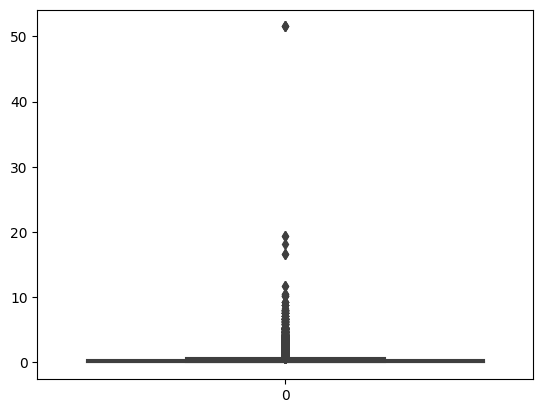

In [77]:
sns.boxplot(df['est_diameter_max']);

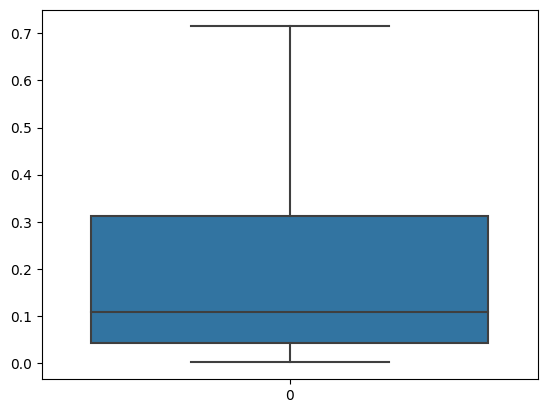

In [78]:
sns.boxplot(df['est_diameter_max'], showfliers=False);

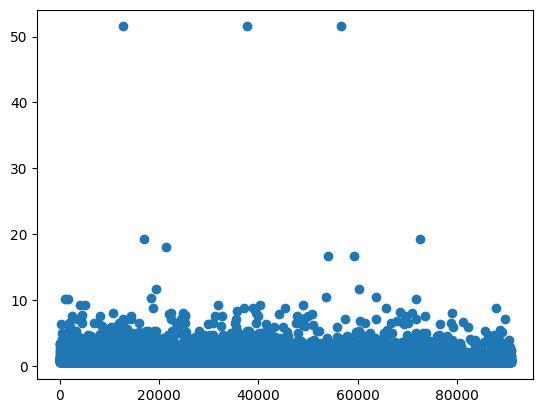

In [79]:
q1_2 = df['est_diameter_max'].quantile(0.25)
q3_2 = df['est_diameter_max'].quantile(0.75)
iqr2 = q3_2 - q1_2

lower_bound2 = q1_1 - 1.5 * iqr2
upper_bound2 = q3_1 + 1.5 * iqr2

outliers2 = df[(df['est_diameter_max'] < lower_bound2) | (df['est_diameter_max'] > upper_bound2)]

plt.scatter(outliers2.index, outliers2['est_diameter_max'],label="Outliers")  
plt.show()

**relative_velocity:**

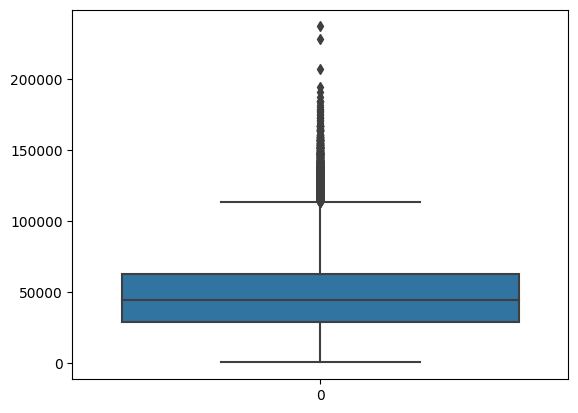

In [80]:
sns.boxplot(df['relative_velocity']);

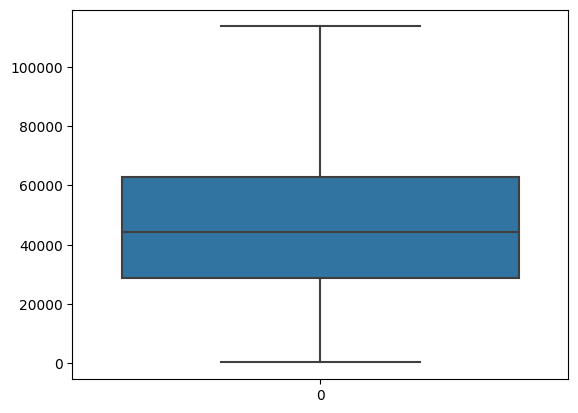

In [81]:
sns.boxplot(df['relative_velocity'],showfliers=False);

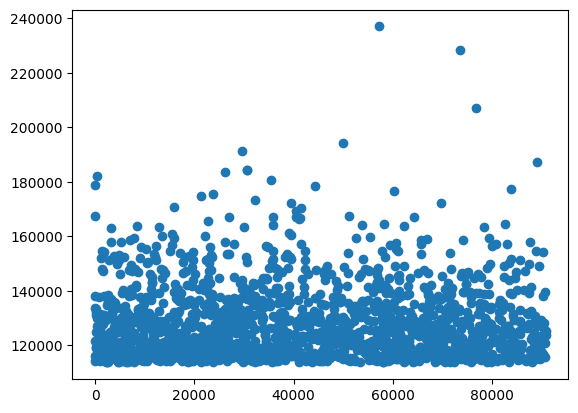

In [82]:
q1_3 = df['relative_velocity'].quantile(0.25)
q3_3 = df['relative_velocity'].quantile(0.75)
iqr3 = q3_3 - q1_3

lower_bound3 = q1_3 - 1.5 * iqr3
upper_bound3 = q3_3 + 1.5 * iqr3

outliers3 = df[(df['relative_velocity'] < lower_bound3) | (df['relative_velocity'] > upper_bound3)]

plt.scatter(outliers3.index, outliers3['relative_velocity'],label="Outliers")  
plt.show()

**miss_distance:**

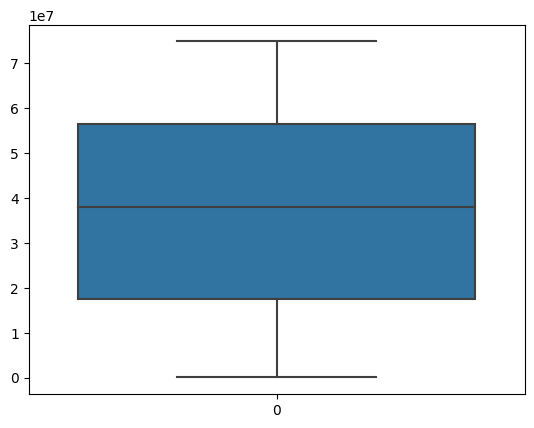

In [83]:
sns.boxplot(df['miss_distance']);

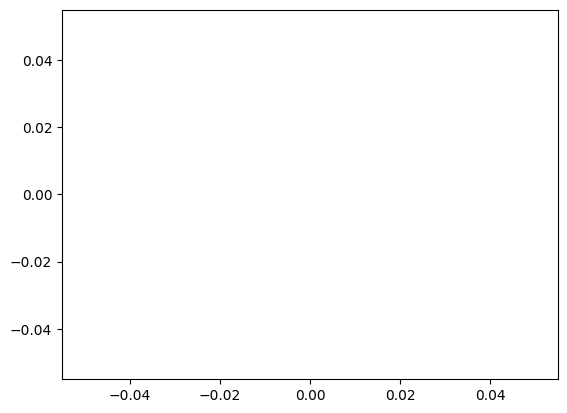

In [84]:
q1_4 = df['miss_distance'].quantile(0.25)
q3_4 = df['miss_distance'].quantile(0.75)
iqr4 = q3_4 - q1_4

lower_bound4 = q1_4 - 1.5 * iqr4
upper_bound4 = q3_4 + 1.5 * iqr4

outliers4 = df[(df['miss_distance'] < lower_bound4) | (df['miss_distance'] > upper_bound4)]

plt.scatter(outliers4.index, outliers4['miss_distance'],label="Outliers")  
plt.show()

In [85]:
#Hata mı aldığımızı yoksa aykırı değer bulunmadığı için mi grafiğin boş olduğunu kontrol edelim.
print("Aykırı değer sayısı:",outliers4.shape[0])

Aykırı değer sayısı: 0


Bu sütun için aykırı değerimiz yokmuş

**absolute_magnitude:**

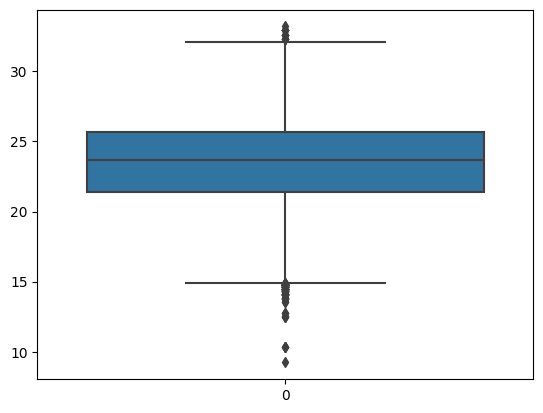

In [86]:
sns.boxplot(df['absolute_magnitude']);

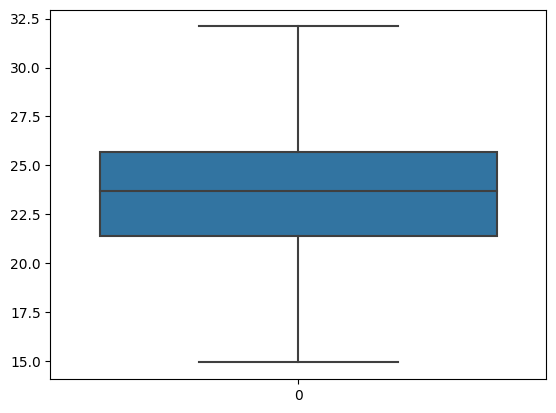

In [87]:
sns.boxplot(df['absolute_magnitude'],showfliers=False);

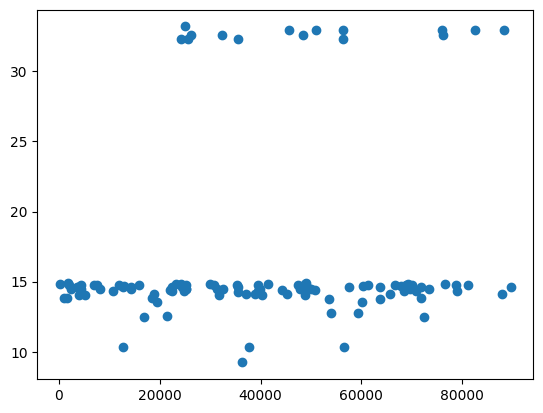

In [88]:
q1_5 = df['absolute_magnitude'].quantile(0.25)
q3_5 = df['absolute_magnitude'].quantile(0.75)
iqr5 = q3_5 - q1_5

lower_bound5 = q1_5 - 1.5 * iqr5
upper_bound5 = q3_5 + 1.5 * iqr5

outliers5 = df[(df['absolute_magnitude'] < lower_bound5) | (df['absolute_magnitude'] > upper_bound5)]

plt.scatter(outliers5.index, outliers5['absolute_magnitude'],label="Outliers")  
plt.show()